## Import packages and default parameters

In [2]:
import lnls.rotating_coil as rc
import lnls.utils as ut

# --- load default analysis parameters for SI Q14 ---
parms = rc.SI_Q14_AnalysisParameters()
print('SI Q14 Default Analysis Parameters'); 
print('==================================')
print(parms)

SI Q14 Default Analysis Parameters
label                          Parameters for SI Q14 quadrupoles
main_harmonic                  2 (quadrupole)
main_harmonic_is_skew          False
reference_radius[mm]           12.000000
harmonics                      [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18]


## Load files and run analysis 

In [3]:
# --- get list of data files ---
fnames = ut.files_get_matches('data')

# --- loads and analysis data files ---
q14_001 = rc.run_analysis(parms, fnames); 

all_data = [[q14_001],]

00 - Q14-001_Q_BOB_+0000A_161010_114321.dat, current:   +0.0579 +/- 0.0059
01 - Q14-001_Q_BOB_+0002A_161010_114408.dat, current:   +2.0559 +/- 0.0064
02 - Q14-001_Q_BOB_+0004A_161010_114456.dat, current:   +4.0509 +/- 0.0062
03 - Q14-001_Q_BOB_+0006A_161010_114543.dat, current:   +6.0461 +/- 0.0073
04 - Q14-001_Q_BOB_+0008A_161010_114631.dat, current:   +8.0428 +/- 0.0059
05 - Q14-001_Q_BOB_+0010A_161010_114719.dat, current:  +10.0398 +/- 0.0072
06 - Q14-001_Q_BOB_+0030A_161010_114808.dat, current:  +30.0108 +/- 0.0143
07 - Q14-001_Q_BOB_+0050A_161010_114858.dat, current:  +49.9975 +/- 0.0154
08 - Q14-001_Q_BOB_+0070A_161010_114947.dat, current:  +70.0159 +/- 0.0302
09 - Q14-001_Q_BOB_+0090A_161010_115037.dat, current:  +90.0263 +/- 0.0401
10 - Q14-001_Q_BOB_+0110A_161010_115126.dat, current: +109.9921 +/- 0.0445
11 - Q14-001_Q_BOB_+0130A_161010_115301.dat, current: +129.9376 +/- 0.0259
12 - Q14-001_Q_BOB_+0150A_161010_115351.dat, current: +149.7663 +/- 0.0235
13 - Q14-001_Q_BOB_+0130A

## Remanent field

In [4]:
(polya_avg,polya_std),(polyb_avg,polyb_std) = rc.get_remanent_field(all_data, current_threshold=0.5)
print('                 skew                     |  normal')
print('                ----------------------------------------------------')
print('dipole [T.m]   : {0:+.3e} +/- {1:.3e} | {2:+.3e} +/- {3:.3e} '.format(polya_avg[0], polya_std[0], polyb_avg[0], polyb_std[0]))
print('quadrupole [T] : {0:+.3e} +/- {1:.3e} | {2:+.3e} +/- {3:.3e} '.format(polya_avg[1], polya_std[1], polyb_avg[1], polyb_std[1]))
print('sextupole [T/m]: {0:+.3e} +/- {1:.3e} | {2:+.3e} +/- {3:.3e} '.format(polya_avg[2], polya_std[2], polyb_avg[2], polyb_std[2]))
print('')

                 skew                     |  normal
                ----------------------------------------------------
dipole [T.m]   : -8.473e-06 +/- 9.398e-06 | -8.370e-07 +/- 6.988e-06 
quadrupole [T] : -2.230e-06 +/- 7.638e-05 | +2.153e+00 +/- 2.072e+00 
sextupole [T/m]: +1.513e-01 +/- 1.444e-01 | +4.434e-02 +/- 4.194e-02 



## Maximum quadrupole strength

In [5]:
ML = parms.max_integ_mult_spec # [T]

d = rc.get_maximum_main_multipole(q14_001,parms,0.5); 
print('{0:<35s}: {1:+.3f} [T]'.format('max integrated quadrupole (spec)', ML))
print('{0:<35s}: {1:+.3f} [T] ({2:+.1f} %)'.format('max integrated quadrupole (data)', d, 100*(d-ML)/ML))
print('')

max integrated quadrupole (spec)   : +5.212 [T]
max integrated quadrupole (data)   : +5.312 [T] (+1.9 %)



## Relative multipoles (saved to PNG files)

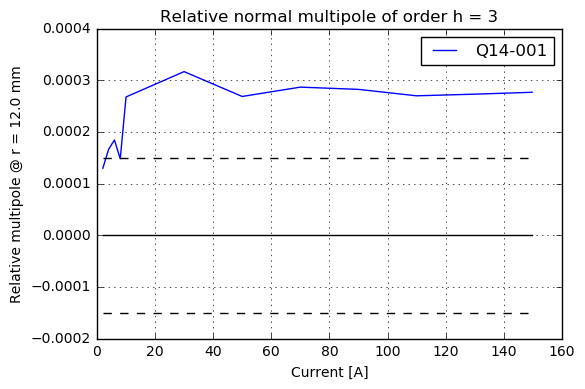

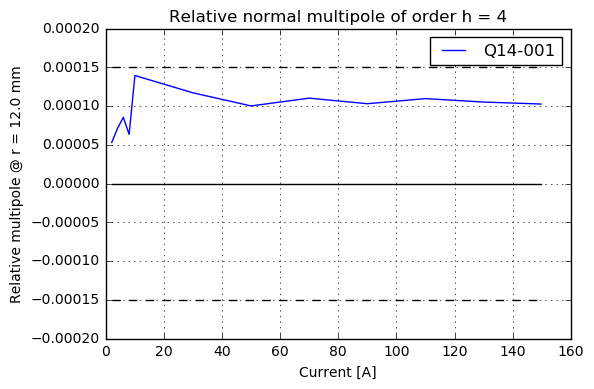

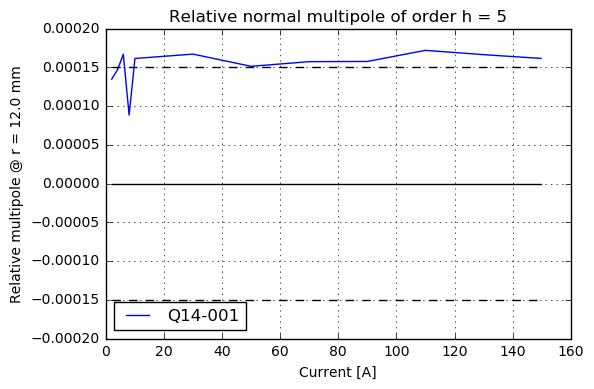

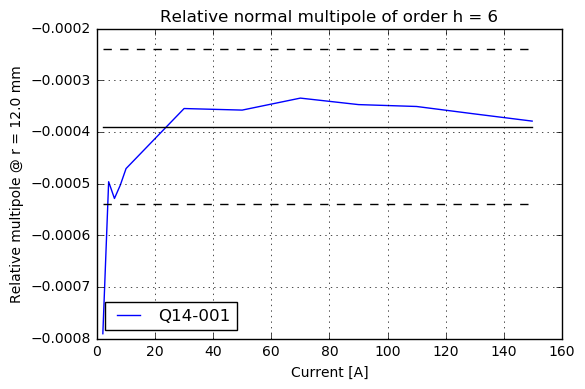

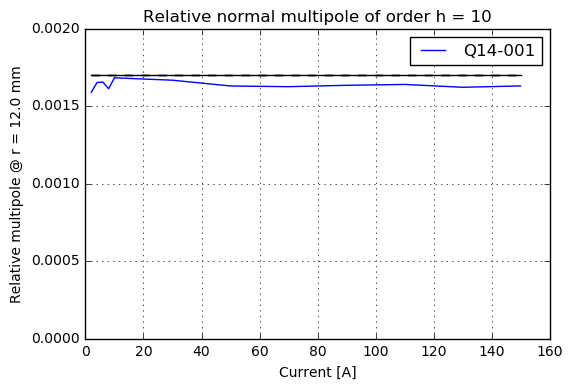

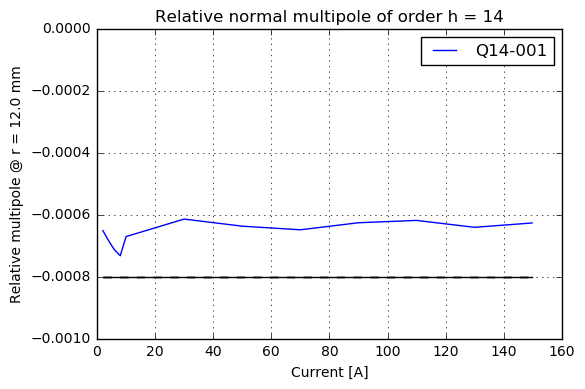

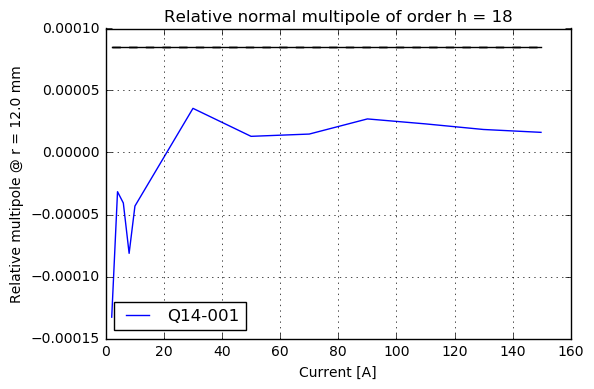

In [6]:
marked_currents = None
show_flag = True
rc.plot_relative_multipoles(all_data, parms, 3,  mtype='normal', current_threshold=0.5, currents=marked_currents, show=show_flag)
rc.plot_relative_multipoles(all_data, parms, 4,  mtype='normal', current_threshold=0.5, currents=marked_currents, show=show_flag, ylim=[-2e-4,2e-4])
rc.plot_relative_multipoles(all_data, parms, 5,  mtype='normal', current_threshold=0.5, currents=marked_currents, show=show_flag, ylim=[-2e-4,2e-4])
rc.plot_relative_multipoles(all_data, parms, 6,  mtype='normal', current_threshold=0.5, currents=marked_currents, show=show_flag, ylim=None)
rc.plot_relative_multipoles(all_data, parms, 10,  mtype='normal', current_threshold=0.5, currents=marked_currents, show=show_flag, ylim=[0,2e-3])
rc.plot_relative_multipoles(all_data, parms, 14,  mtype='normal', current_threshold=0.5, currents=marked_currents, show=show_flag, ylim=[-10e-4,0])
rc.plot_relative_multipoles(all_data, parms, 18,  mtype='normal', current_threshold=0.5, currents=marked_currents, show=show_flag, ylim=None)

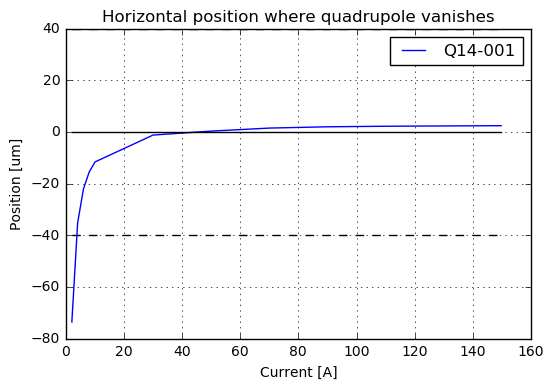

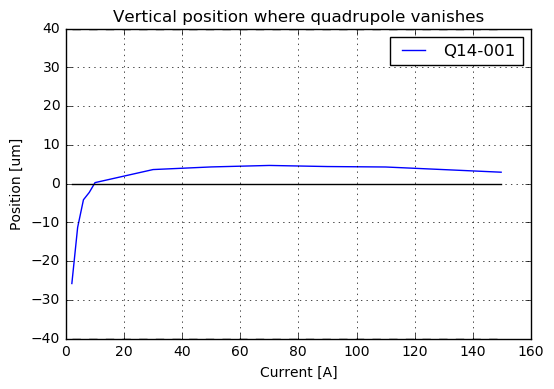

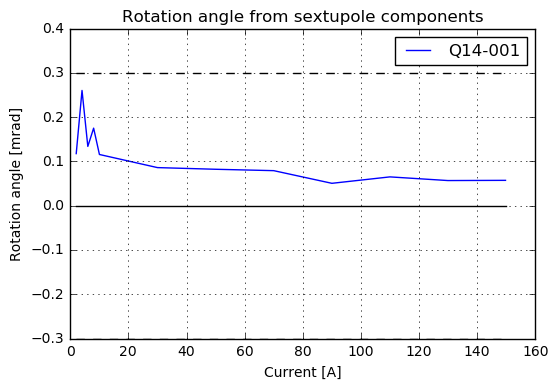

h  :      (B_n/B_2)@r_0        |       (B_n/B_2)@r_0      
----------------------------------------------------------
01 : -1.982e-04 +/- 0.000e+00  |  -2.429e-04 +/- 0.000e+00
02 : +1.000e+00 +/- 0.000e+00  |  +5.712e-05 +/- 0.000e+00
03 : +2.766e-04 +/- 0.000e+00  |  +8.277e-04 +/- 0.000e+00
04 : +1.025e-04 +/- 0.000e+00  |  +6.480e-05 +/- 0.000e+00
05 : +1.614e-04 +/- 0.000e+00  |  +5.488e-05 +/- 0.000e+00
06 : -3.792e-04 +/- 0.000e+00  |  +4.091e-05 +/- 0.000e+00
07 : +9.774e-05 +/- 0.000e+00  |  -3.840e-06 +/- 0.000e+00
08 : +5.595e-05 +/- 0.000e+00  |  +1.791e-05 +/- 0.000e+00
09 : +5.092e-05 +/- 0.000e+00  |  -3.072e-05 +/- 0.000e+00
10 : +1.630e-03 +/- 0.000e+00  |  -2.569e-05 +/- 0.000e+00
11 : +7.019e-05 +/- 0.000e+00  |  -2.736e-05 +/- 0.000e+00
12 : +7.363e-05 +/- 0.000e+00  |  -3.053e-05 +/- 0.000e+00
13 : +6.532e-05 +/- 0.000e+00  |  -2.347e-05 +/- 0.000e+00
14 : -6.273e-04 +/- 0.000e+00  |  -3.233e-05 +/- 0.000e+00
15 : +4.018e-05 +/- 0.000e+00  |  -4.411e-05 +/- 0.000e+

In [7]:
show_flag = True


# --- Magnetic center
rc.plot_magnetic_center(all_data, parms, mtype='normal', currents=marked_currents, show=show_flag)
rc.plot_magnetic_center(all_data, parms, mtype='skew',   currents=marked_currents, show=show_flag)

# --- Rotation Angle
rc.plot_rotation_angle(all_data, parms, currents=marked_currents, show=show_flag)

# --- Printout of relative multipole at maximum_current
max_current = 150
rc.print_multipoles(all_data, parms, max_current, 0.5)